# Loading the data in the python environment

In [6]:


import pandas as pd

# Load the chat data from the text file
chat_data = pd.read_csv('C:/Users/Akram/Downloads/whatsapp.txt', header=None, names=['message'])

# Print the first few rows of the chat data
print(chat_data.head())

                                                                                                       message
[16/05/23   10:54:04 AM] Shahzeb : ‎Messages and calls are...  not even WhatsApp   can read or listen to them.
            10:54:04 AM] Shahzeb : Vid aur photo send krna... NaN                                          NaN
‎[16/05/23  12:22:10 PM] Akram 😁❤️❤️: ‎image omitted          NaN                                          NaN
            12:22:21 PM] Akram 😁❤️❤️: ‎image omitted          NaN                                          NaN
            12:22:32 PM] Akram 😁❤️❤️: ‎image omitted          NaN                                          NaN


In [7]:
print(chat_data.tail())

                                                             message
[07/05/24  8:10:21 PM] Shahzeb : Kon se jagha hai e wala NaN     NaN
[09/05/24  9:05:12 AM] Shahzeb : Pic bhej na iska inside NaN     NaN
           9:05:25 AM] Shahzeb : Ya owner ka no dena     NaN     NaN
           1:17:59 PM] Akram 😁❤️❤️: 9318370885           NaN     NaN
           1:18:14 PM] Akram 😁❤️❤️: Yash gupta           NaN     NaN


# #Defining the specific function or methods for preprocessing the text data

In [10]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

nltk.download('punkt')
nltk.download('stopwords')

def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z]', '', text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    
    # Join the tokens back into a string
    text = ' '.join(tokens)
    
    return text

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Akram\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Akram\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [13]:
!pip install spacy

  Obtaining dependency information for spacy from https://files.pythonhosted.org/packages/39/e1/08681583569f435347ced0535b27c073fcc9a927d9b4293c963092f2d01c/spacy-3.7.5-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for spacy-legacy<3.1.0,>=3.0.11 from https://files.pythonhosted.org/packages/c3/55/12e842c70ff8828e34e543a2c7176dac4da006ca6901c9e8b43efab8bc6b/spacy_legacy-3.0.12-py2.py3-none-any.whl.metadata
  Obtaining dependency information for spacy-loggers<2.0.0,>=1.0.0 from https://files.pythonhosted.org/packages/33/78/d1a1a026ef3af911159398c939b1509d5c36fe524c7b644f34a5146c4e16/spacy_loggers-1.0.5-py3-none-any.whl.metadata
  Obtaining dependency information for murmurhash<1.1.0,>=0.28.0 from https://files.pythonhosted.org/packages/71/46/af01a20ec368bd9cb49a1d2df15e3eca113bbf6952cc1f2a47f1c6801a7f/murmurhash-1.0.10-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cymem<2.1.0,>=2.0.2 from https://files.pythonhosted.org/packages/c1/c3/dd

In [15]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
      --------------------------------------- 0.2/12.8 MB 6.9 MB/s eta 0:00:02
      --------------------------------------- 0.3/12.8 MB 3.5 MB/s eta 0:00:04
     - -------------------------------------- 0.4/12.8 MB 2.9 MB/s eta 0:00:05
     - -------------------------------------- 0.4/12.8 MB 2.5 MB/s eta 0:00:05
     - -------------------------------------- 0.6/12.8 MB 2.5 MB/s eta 0:00:05
     -- ------------------------------------- 0.7/12.8 MB 2.5 MB/s eta 0:00:05
     -- ------------------------------------- 0.8/12.8 MB 2.4 MB/s eta 0:00:05
     -- ------------------------------------- 0.8/12.8 MB 2.4 MB/s eta 0:00:05
     -- ------------------------------------- 0.9/12.8 MB 2.3 MB/s eta 0:00:06
     --- ------------------------------------ 1.0/12.8 MB 2.3 MB/s eta 0:00:06
     --- ------------------------------------ 1.1/12.8 MB 2.2 MB/s eta 0:00:06
     --- ------------------------------------ 1.1/12.8 MB 2

# Incorporating NLP techniques for cleaning the text data

In [18]:
 #Incorporating NLP techniques for cleaning the text data

import spacy
import numpy as np

nlp = spacy.load('en_core_web_sm')

def extract_entities(text):
    doc = nlp(text)
    entities = [(entity.text, entity.label_) for entity in doc.ents]
    return entities

# Filter out rows with NaN values in the 'message' column
chat_data_cleaned = chat_data.dropna(subset=['message'])

# Apply the entity extraction function to the chat data
chat_data_cleaned['entities'] = chat_data_cleaned['message'].apply(extract_entities)

C:\Users\Akram\AppData\Local\Temp\ipykernel_4624\3771775393.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chat_data_cleaned['entities'] = chat_data_cleaned['message'].apply(extract_entities)


#  Creating Word Clouds of the processed chat data

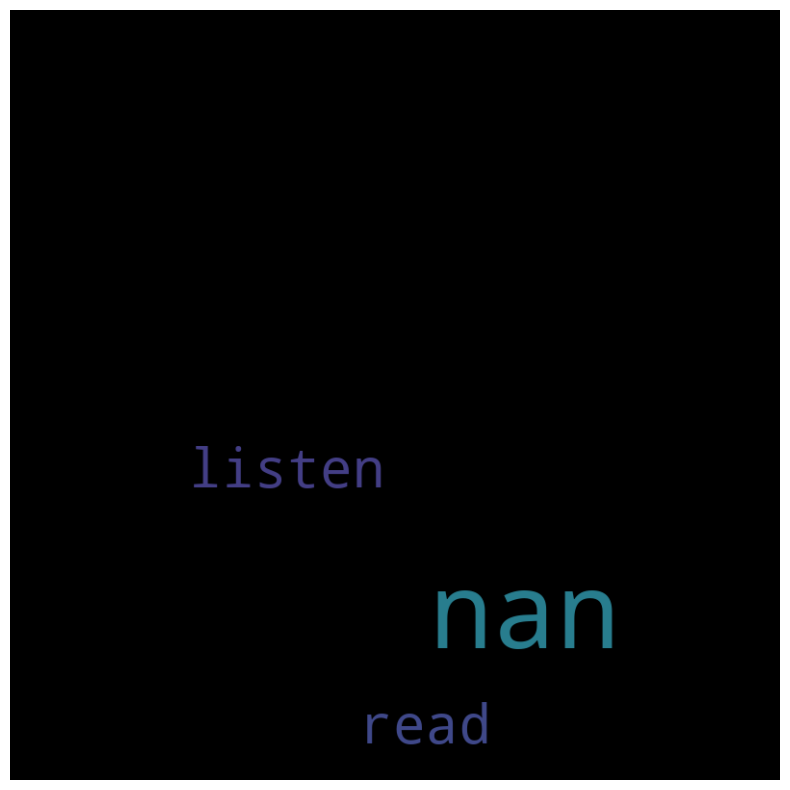

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a word cloud from the preprocessed chat data
wordcloud = WordCloud(width=800, height=800, random_state=21, max_font_size=110).generate(' '.join(map(str, chat_data['message'])))

# Display the word cloud
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Save the word cloud to a file
wordcloud.to_file('wordcloud.png')

# Extracting information through sentiment analysis

In [25]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Akram\AppData\Roaming\nltk_data...


True

In [27]:
chat_data['message'] = chat_data['message'].astype(str)

In [28]:
chat_data['message'] = chat_data['message'].astype(str)
chat_data['sentiment'] = chat_data['message'].apply(analyze_sentiment)

In [29]:
from nltk.sentiment import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

def analyze_sentiment(text):
    sentiment = sia.polarity_scores(text)
    return sentiment

# Apply the sentiment analysis function to the chat data
chat_data['sentiment'] = chat_data['message'].apply(analyze_sentiment)

In [34]:
print(chat_data['sentiment'].isnull().sum())

0


In [32]:
print(chat_data['sentiment'].head())

[16/05/23    10:54:04 AM] Shahzeb : ‎Messages and calls are end-to-end encrypted. No one outside of this chat   not even WhatsApp    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
             10:54:04 AM] Shahzeb : Vid aur photo send krna hmko                                               NaN                   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
‎[16/05/23   12:22:10 PM] Akram 😁❤️❤️: ‎image omitted                                                          NaN                   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
             12:22:21 PM] Akram 😁❤️❤️: ‎image omitted                                                          NaN                   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
             12:22:32 PM] Akram 😁❤️❤️: ‎image omitted                                                          NaN                   {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: sentiment, dtype: object


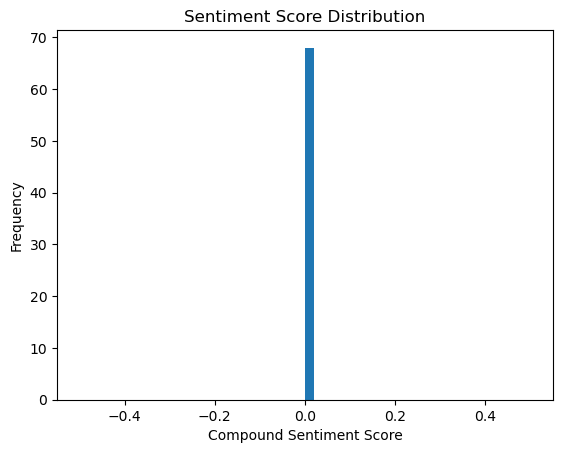

In [33]:
import matplotlib.pyplot as plt

plt.hist(chat_data['sentiment'].apply(lambda x: x['compound']), bins=50)
plt.xlabel('Compound Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Score Distribution')
plt.show()